# CMPUT 466 Final Project
Arun Woosaree

I will be doing binary classification with 3 different algorithms to detect spam in emails

In [ ]:
%%bash
pipenv install
kaggle datasets download -d uciml/sms-spam-collection-dataset
unzip -f sms-spam-collection-dataset.zip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# drop the useless columns and rename spam: 1 ham: 0
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
data.rename(columns={"v1": "label", "v2": "text"}, inplace=True)
data.replace({'spam': 1, 'ham': 0}, inplace=True)
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


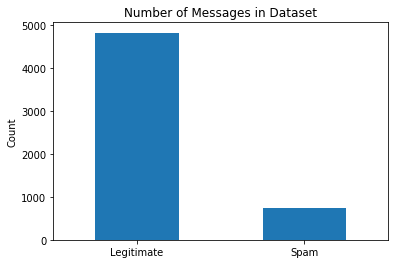

In [4]:
num = pd.value_counts(data['label'],sort=True).sort_index()
num.plot(kind='bar')
plt.title('Number of Messages in Dataset')
plt.xticks((0, 1), ("Legitimate", "Spam"), rotation=0)
plt.ylabel('Count')
# plt.show()
plt.savefig("images/histogram.png")

In [5]:

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV

X = TfidfVectorizer().fit_transform(data['text']).toarray()
t = data["label"]
print(f"Trivial classifier: all Legitimate accuracy: {accuracy_score(t, np.zeros_like(t))}")



Trivial classifier: all Legitimate accuracy: 0.8659368269921034


In [6]:
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html?highlight=validation%20curve
# https://www.dataquest.io/blog/learning-curves-machine-learning/
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


# https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py


## Linear Classification
using sklearn

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()
# train_scores, valid_scores = validation_curve(LinearRegression(), X, t, param_name="normalize", param_range=(True, False), n_jobs=-1)
# plot_learning_curve(LinearRegression(), "Linear Regression", X, t, n_jobs=-1)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [37]:
# from sklearn.metrics import make_scorer
accuracies = cross_val_score(lr, X, t, n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[-5.65040355e+21 -9.81418293e+20 -1.09032680e+22 -3.09887233e+22
 -7.25340690e+22]


'Mean accuracy: -2.4211576427659913e+22'

## Logistic regression


In [24]:
from sklearn.linear_model import LogisticRegression
# train_scores, valid_scores = validation_curve(LogisticRegression(), X, t, param_name="penalty", param_range=('l1',), n_jobs=-1)
# plot_learning_curve(LogisticRegression(), "Logistic Regression", X, t, n_jobs=-1)
lgr = LogisticRegression()
lgr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
accuracies = cross_val_score(lgr, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.96143498 0.96233184 0.96140036 0.95691203 0.96319569]


'Mean accuracy: 0.9610549790276224'

In [33]:
params = {
    'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'penalty': ('l1', 'l2', 'elasticnet', 'none'),
}
lg_gs = GridSearchCV(lgr, params, n_jobs=-1, verbose=4)
lg_gs = lg_gs.fit(X, t)
print("best score", lg_gs.best_score_)
print("best params", lg_gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 2/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   3.0s
[CV 4/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   3.0s
[CV 1/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   3.3s
[CV 5/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   3.4s
[CV 1/5] END ..............penalty=l1, solver=sag;, score=nan total time=   3.3s
[CV 1/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   3.4s
[CV 2/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   3.4s
[CV 3/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   3.5s
[CV 4/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   3.5s
[CV 5/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   3.5s
[CV 3/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   3.5s
[CV 3/5] END ......penalty=l1, solver=liblinear

/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...........penalty=l1, solver=saga;, score=0.966 total time= 1.4min


/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...........penalty=l1, solver=saga;, score=0.970 total time= 1.5min
[CV 3/5] END ...........penalty=l1, solver=saga;, score=0.967 total time= 1.5min


/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...........penalty=l1, solver=saga;, score=0.951 total time= 1.5min
[CV 5/5] END ...........penalty=l1, solver=saga;, score=0.951 total time= 1.5min
[CV 3/5] END ....penalty=none, solver=newton-cg;, score=0.983 total time=  56.0s
[CV 5/5] END ....penalty=none, solver=newton-cg;, score=0.980 total time=  56.1s
[CV 4/5] END ....penalty=none, solver=newton-cg;, score=0.983 total time=  57.4s
[CV 1/5] END ....penalty=none, solver=newton-cg;, score=0.981 total time=  58.3s
[CV 2/5] END ....penalty=none, solver=newton-cg;, score=0.985 total time=  59.0s


/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/

[CV 1/5] END ..........penalty=none, solver=sag;, score=0.981 total time=  48.9s
[CV 5/5] END ..........penalty=none, solver=sag;, score=0.981 total time=  44.2s
[CV 2/5] END ..........penalty=none, solver=sag;, score=0.984 total time=  48.2s
[CV 3/5] END ..........penalty=none, solver=sag;, score=0.983 total time=  47.7s
[CV 4/5] END ..........penalty=none, solver=sag;, score=0.982 total time=  48.5s


/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .........penalty=none, solver=saga;, score=0.980 total time=  49.0s


/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .........penalty=none, solver=saga;, score=0.984 total time=  40.2s


/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .........penalty=none, solver=saga;, score=0.978 total time=  38.6s


/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .........penalty=none, solver=saga;, score=0.983 total time=  40.7s
[CV 4/5] END .........penalty=none, solver=saga;, score=0.981 total time=  39.2s


/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/arunscape/.local/share/virtualenvs/final_project-Td-GkHvP/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self

best score 0.9824118636835706
best params {'penalty': 'none', 'solver': 'newton-cg'}


In [7]:
from sklearn.naive_bayes import MultinomialNB
# train_scores, valid_scores = validation_curve(MultinomialNB(), X, t, param_name="fit_prior", param_range=(True,), n_jobs=-1)
nb = MultinomialNB()
nb.get_params()
# plot_learning_curve(MultinomialNB(), "Multinomial Naive Bayes", X, t, n_jobs=-1)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [8]:
accuracies = cross_val_score(nb, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.9632287  0.95515695 0.95780969 0.9551167  0.96229803]


'Mean accuracy: 0.9587220133482541'

In [9]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [10]:
accuracies = cross_val_score(p, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.98116592 0.98116592 0.98204668 0.98025135 0.97935368]


'Mean accuracy: 0.9807967088261103'

In [20]:
params = {
    'penalty': ('l1', 'l2', 'elasticnet', 'none'),
    'max_iter': (500, 1000, 2000)
}
p_gs = GridSearchCV(p, params, n_jobs=-1, verbose=4, scoring="accuracy")
p_gs = p_gs.fit(X, t)
print("best score", p_gs.best_score_)
print("best params", p_gs.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 5/5] END ..........max_iter=500, penalty=l2;, score=0.969 total time=   3.5s
[CV 1/5] END ..........max_iter=500, penalty=l2;, score=0.971 total time=   3.7s
[CV 1/5] END ........max_iter=500, penalty=none;, score=0.981 total time=   3.7s
[CV 4/5] END ..........max_iter=500, penalty=l2;, score=0.954 total time=   4.1s
[CV 2/5] END ..........max_iter=500, penalty=l2;, score=0.962 total time=   4.2s
[CV 3/5] END ..........max_iter=500, penalty=l2;, score=0.966 total time=   4.7s
[CV 3/5] END ..max_iter=500, penalty=elasticnet;, score=0.955 total time=   4.9s
[CV 2/5] END ........max_iter=500, penalty=none;, score=0.981 total time=   1.4s
[CV 2/5] END ..........max_iter=500, penalty=l1;, score=0.976 total time=   5.5s
[CV 3/5] END ..........max_iter=500, penalty=l1;, score=0.965 total time=   5.7s
[CV 5/5] END ..max_iter=500, penalty=elasticnet;, score=0.963 total time=   5.8s
[CV 4/5] END ..........max_iter=500, penalty=l1;

In [21]:
from sklearn.neural_network import MLPClassifier
# train_scores, valid_scores = validation_curve(MLPClassifier(), X, t, param_name="solver", param_range=('lbfgs', 'sgd', 'adam'), n_jobs=-1)
# plot_learning_curve(MLPClassifier(), "Multilayer Perceptron", X, t, n_jobs=-1)
mlp = MLPClassifier()
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [22]:
accuracies = cross_val_score(mlp, X, t, scoring="accuracy", n_jobs=-1)
print(accuracies)
f"Mean accuracy: {np.mean(accuracies)}"

[0.98744395 0.98565022 0.98294434 0.98384201 0.98384201]


'Mean accuracy: 0.9847445073302687'

In [23]:
params = {
    'activation': ('relu', 'identity', 'logistic', 'tanh'),
    'hidden_layer_sizes': ((100), (100, 50, 25), (100, 80, 60, 40, 20, 10)),
    'learning_rate': ('invscaling', 'adaptive', 'constant'),
    'max_iter': (400, 800, 1600)
}
mlp_gs = GridSearchCV(mlp, params, n_jobs=-1, verbose=4)
mlp_gs = mlp_gs.fit(X, t)
print("best score", mlp_gs.best_score_)
print("best params", mlp_gs.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 3/5] END activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=800;, score=0.983 total time= 6.5min
[CV 3/5] END activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=1600;, score=0.983 total time= 6.7min
[CV 5/5] END activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=1600;, score=0.983 total time= 6.9min
[CV 1/5] END activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=800;, score=0.987 total time= 6.9min
[CV 4/5] END activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=1600;, score=0.982 total time= 7.0min
[CV 2/5] END activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=1600;, score=0.985 total time= 7.0min
[CV 4/5] END activation=relu, hidden_layer_sizes=100, learning_rate=invscaling, max_iter=400;, score=0.983 total time= 7.0min
[CV 1/5] END activation=relu, hidden_layer_sizes=100